### Analisis Exploratorio de Datos

In [1]:
# importa las librerias
import pandas as pd
import geopandas as gpd
from shapely.wkt import loads
from shapely.geometry import Point
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# carga el dataset limpio en la variable "dataset"

dataset = pd.read_csv("Data/homicidios_limpio.csv")

dataset.head()

,Id,Rol,Sexo,Edad,Fecha fallecimiento,Rango etario,Num víctimas,Fecha,Año,Mes,...,Comuna,Xy (caba),Pos x,Pos y,Participantes,Victima,Acusado,Coordenada x,Coordenada y,Dias de la semana
0,2016-0001,CONDUCTOR,MASCULINO,19,2016-01-01,Menos de 20,1,2016-01-01,2016.0,1.0,...,Comuna N°8,Point (98896.78238426 93532.43437792),-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO,98896.782384,93532.434378,Viernes
1,2016-0002,CONDUCTOR,MASCULINO,70,2016-01-02,Entre 61-80,1,2016-01-02,2016.0,1.0,...,Comuna N°9,Point (95832.05571093 95505.41641999),-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS,95832.055711,95505.416420,Sábado
2,2016-0003,CONDUCTOR,MASCULINO,30,2016-01-03,Entre 21-40,1,2016-01-03,2016.0,1.0,...,Comuna N°1,Point (106684.29090040 99706.57687843),-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO,106684.290900,99706.576878,Domingo
3,2016-0004,CONDUCTOR,MASCULINO,18,NaN,Menos de 20,1,2016-01-10,2016.0,1.0,...,Comuna N°8,Point (99840.65224780 94269.16534422),-58.465039,-34.680930,MOTO-SD,MOTO,SD,99840.652248,94269.165344,Domingo
4,2016-0005,CONDUCTOR,MASCULINO,29,2016-02-01,Entre 21-40,1,2016-01-21,2016.0,1.0,...,Comuna N°1,Point (106980.32827929 100752.16915795),-58.387183,-34.622466,MOTO-PASAJEROS,MOTO,PASAJEROS,106980.328279,100752.169158,Jueves


In [77]:
dataset.columns

Index(['Id', 'Rol', 'Sexo', 'Edad', 'Fecha fallecimiento', 'Rango etario',
       'Num víctimas', 'Fecha', 'Año', 'Mes', 'Día', 'Hora',
       'Hora_sin_minutos', 'Lugar del hecho', 'Tipo de calle', 'Calle',
       'Altura', 'Cruce', 'Dirección normalizada', 'Comuna', 'Xy (caba)',
       'Pos x', 'Pos y', 'Participantes', 'Victima', 'Acusado', 'Coordenada x',
       'Coordenada y', 'Dias de la semana'],
      dtype='object')

### Matriz de confusión

#### Extrae las columnas "victima" y acusado para anlizar de forma grafica las distribuciones subyacentes.

In [59]:
# Calcula una tabla de frecuencias cruzadas entre las columnas 'Victima' y 'Acusado' en el DataFrame 'dataset'.
distribucion = pd.crosstab(dataset['Victima'], dataset['Acusado'])


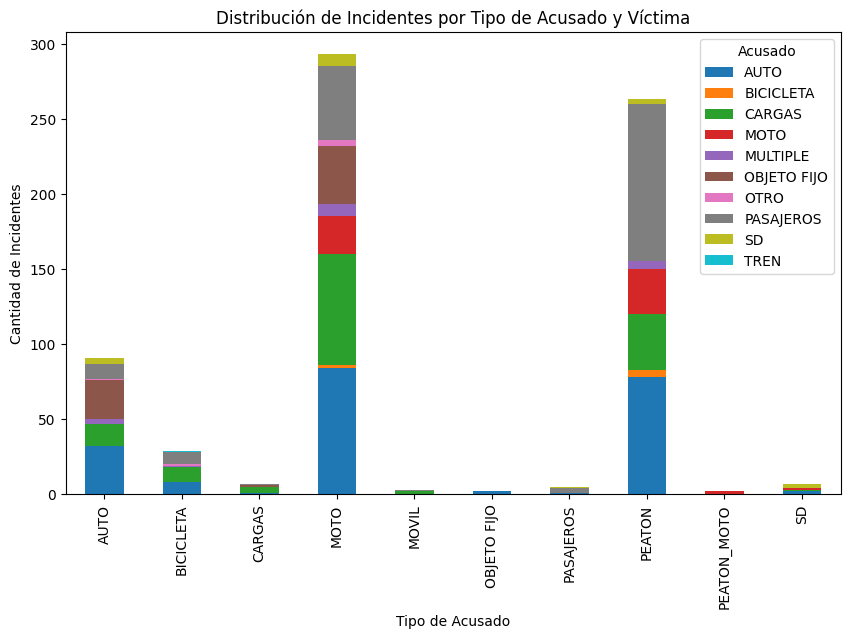

In [60]:
# Utiliza el estilo de gráfico 'bar' para representar la matriz de frecuencias cruzadas.
distribucion.plot(kind='bar', stacked=True, figsize=(10, 6))

# Añade etiquetas y título al gráfico.
plt.xlabel('Tipo de Acusado')
plt.ylabel('Cantidad de Incidentes')
plt.title('Distribución de Incidentes por Tipo de Acusado y Víctima')

# Muestra el gráfico.
plt.show()


#### Conclusion

1. **Relación entre Acusado y Víctima:**
   - Los accidentes donde el acusado es un "AUTO" son más frecuentes en colisiones con "AUTO", "OBJETO FIJO" y "PASAJEROS".
   - Los accidentes donde el acusado es una "MOTO" están más distribuidos entre varias categorías de víctimas, siendo más comunes en colisiones con "AUTO" y "PASAJEROS".
   - Hay pocos casos de "BICICLETA" como acusado, y tienden a colisionar con "AUTO" y "PASAJEROS".

2. **Relación Específica:**
   - Hay casos en los que "PEATON" es acusado y "PEATON" es la víctima, lo que podría indicar accidentes peatonales sin la intervención de otros vehículos.

3. **Falta de Datos (SD):**
   - Hay algunos casos donde la categoría de acusado o víctima está marcada como "SD" (sin datos).

Estas observaciones son indicativas de las relaciones más frecuentes entre los tipos de acusados y víctimas en el conjunto de datos.


In [61]:
# Calcula la distribución porcentual de los valores únicos en la columna 'Sexo'.
# La función value_counts() cuenta la frecuencia de cada valor único.
# El parámetro normalize=True indica que se desea obtener los porcentajes en lugar de las frecuencias absolutas.
# Luego, se multiplica por 100 para obtener los porcentajes.

distribucion_por_sexo = dataset['Sexo'].value_counts(normalize=True) * 100


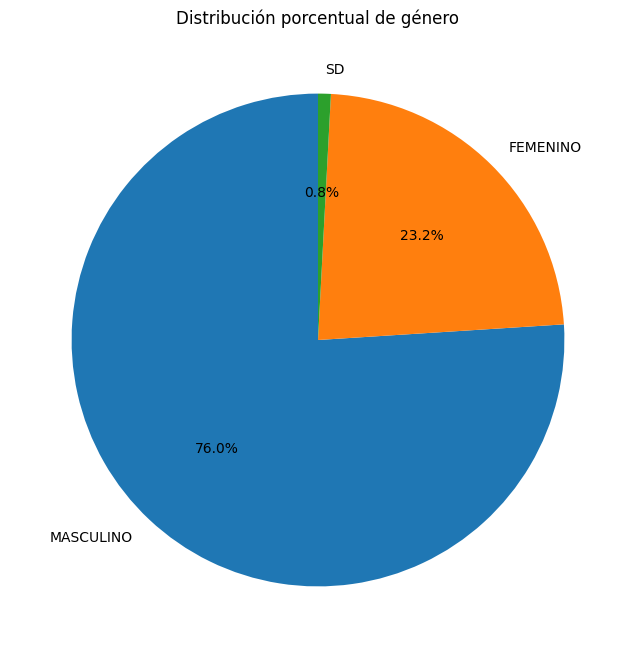

In [62]:
# Utiliza el estilo de gráfico 'pie' para representar la distribución porcentual de los valores en la columna 'Sexo'.
distribucion_por_sexo.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(8, 8))

# Añade etiquetas y título al gráfico.
plt.title('Distribución porcentual de género')
plt.ylabel('')  # Elimina la etiqueta del eje y para mayor claridad.

# Muestra el gráfico.
plt.show()


**Los casos están representados por individuos de género masculino, con un 76.0%.**

**El género femenino constituye el 23.2% de los casos, mientras que hay un pequeño porcentaje del 0.8% de casos en los que el género está marcado como no especificado**

In [63]:
# Calcula la tabla de frecuencias cruzadas entre las columnas 'Rol' y 'Sexo' del DataFrame 'dataset'

distribucion_vehiculo = pd.crosstab(dataset['Rol'], dataset['Sexo'])


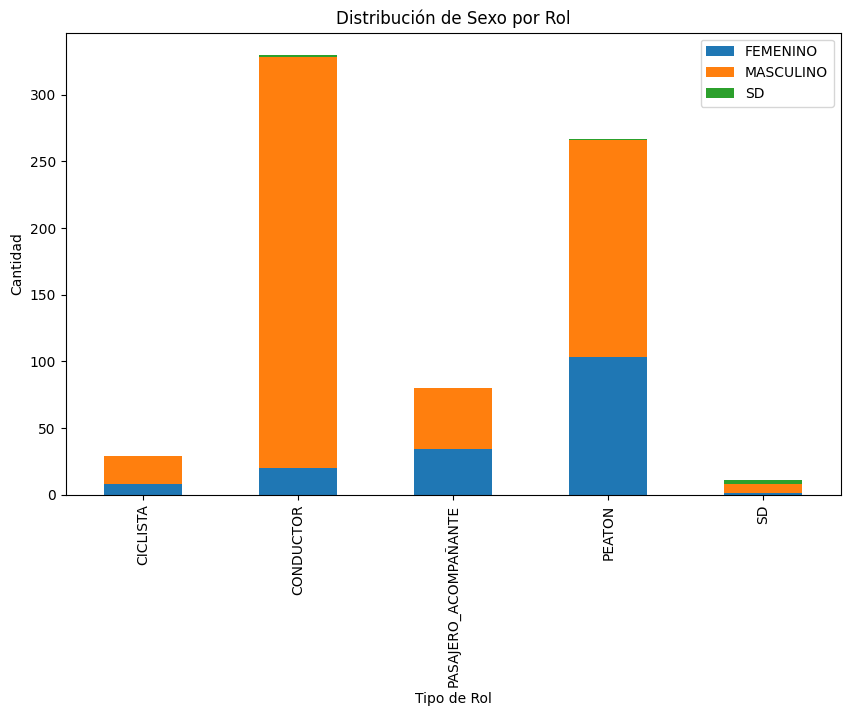

In [64]:
# Crear un DataFrame a partir de la salida proporcionada.
data = {
    'FEMENINO': [8, 20, 34, 103, 1],
    'MASCULINO': [21, 308, 46, 163, 7],
    'SD': [0, 2, 0, 1, 3]
}
df_sexo_por_rol = pd.DataFrame(data, index=['CICLISTA', 'CONDUCTOR', 'PASAJERO_ACOMPAÑANTE', 'PEATON', 'SD'])

# Utiliza el estilo de gráfico 'bar' para representar la matriz de frecuencias cruzadas.
df_sexo_por_rol.plot(kind='bar', stacked=True, figsize=(10, 6))

# Añade etiquetas y título al gráfico.
plt.xlabel('Tipo de Rol')
plt.ylabel('Cantidad')
plt.title('Distribución de Sexo por Rol')

# Muestra el gráfico.
plt.show()



**CICLISTA:**

 - Hay una cantidad relativamente baja de casos en los que el ciclista es de género femenino (8 casos) en comparación con casos de género masculino (21 casos).

**CONDUCTOR:**

 - La mayoría de los conductores son de género masculino, con 308 casos, mientras que hay 20 casos de género femenino.

**PASAJERO ACOMPAÑANTE:**

 - La distribución entre géneros es más equitativa en el rol de pasajero acompañante, con 34 casos de género femenino y 46 de género masculino.

**PEATON:**

 - La mayoría de los peatones son de género femenino (103 casos) y masculino (163 casos), con solo 1 caso no especificado (SD).

**SD (Sin Datos):**

 - La categoría 'SD' representa casos con género no especificado y se observan en varios roles, siendo más notable en el rol de conductor con 2 casos.

In [65]:
# Crea una tabla de distribución cruzada entre las columnas 'Victima' y 'Sexo' 

distribucion = pd.crosstab(dataset['Victima'], dataset['Sexo'])


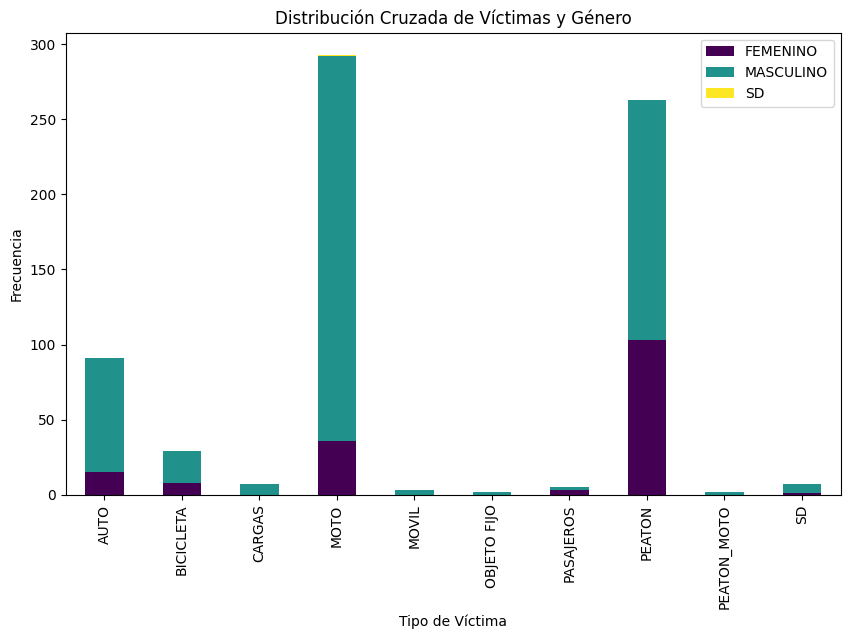

In [66]:
data = {
    'FEMENINO': [15, 8, 0, 36, 0, 0, 3, 103, 0, 1],
    'MASCULINO': [76, 21, 7, 256, 3, 2, 2, 160, 2, 6],
    'SD': [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
}

index = ['AUTO', 'BICICLETA', 'CARGAS', 'MOTO', 'MOVIL', 'OBJETO FIJO', 'PASAJEROS', 'PEATON', 'PEATON_MOTO', 'SD']

# Crear un DataFrame a partir de los datos
df = pd.DataFrame(data, index=index)

# Graficar la distribución cruzada como un gráfico de barras apiladas
ax = df.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

# Añadir etiquetas y título al gráfico
plt.xlabel('Tipo de Víctima')
plt.ylabel('Frecuencia')
plt.title('Distribución Cruzada de Víctimas y Género')

# Mostrar el gráfico
plt.show()

1. **Mayor número de víctimas femeninas en peatones:**
 - La categoría "PEATON" muestra un considerable número de víctimas femeninas en comparación con otras categorías, con 103 casos, mientras que el número de víctimas masculinas es de 160.

2. **Alto número de víctimas masculinas en motocicletas:**
 - La categoría "MOTO" presenta un número significativamente mayor de víctimas masculinas (256) en comparación con las víctimas femeninas (36). Además, hay un caso con sexo no especificado (SD).

3. **Proporción equitativa en accidentes de auto:**
 - La categoría "AUTO" tiene una distribución más equitativa entre víctimas femeninas (15) y masculinas (76), sin casos no especificados.

4. **Pocas víctimas en otras categorías:**
 - Algunas categorías como "OBJETO FIJO," "MOVIL," y "PEATON_MOTO" tienen un número bajo de víctimas, y algunas categorías como "CARGAS" no tienen víctimas femeninas.

In [14]:
# inicia el sistma de referencia espascial con el 'epsg:4326' EPSG que representa el sistema de referencia WGS 84.
# El sistema WGS 84 utiliza grados decimales para representar ubicaciones geográficas.
sistema_referencia = {'init':'epsg:4326'}

In [15]:
# Creación de objetos Point para representar geometría espacial.
# Se utiliza la función Point del módulo shapely.geometry.
# La lista comprehension zip(dataset["Pos x"], dataset["Pos y"]) combina las columnas "Pos x" y "Pos y" en pares (x, y).
# El resultado es una lista de objetos Point que representan la geometría espacial de las coordenadas.

geometria_espacial = [Point(xy) for xy in zip(dataset["Pos x"], dataset["Pos y"])]

gdf = gpd.GeoDataFrame(geometry=geometria_espacial)

In [16]:
# Creación de un GeoDataFrame con los datos y la geometría espacial
ubicacion_geografica = gpd.GeoDataFrame(dataset, crs=sistema_referencia, geometry=geometria_espacial)

c:\Users\JAGER\AppData\Local\Programs\Python\Python37\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [17]:
# Configuración para restaurar o crear el archivo SHX si es necesario
# Esto ayuda a resolver el error CPLE_OpenFailedError al leer el archivo shapefile
os.environ['SHAPE_RESTORE_SHX'] = 'YES'

# Lectura del archivo shapefile para crear un GeoDataFrame
mapa_espacial = gpd.read_file("Data/comunas_wgs84.shp")


c:\Users\JAGER\AppData\Local\Programs\Python\Python37\lib\site-packages\geopandas\plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


Text(158.98305973900304, 0.5, 'cordenadas y')

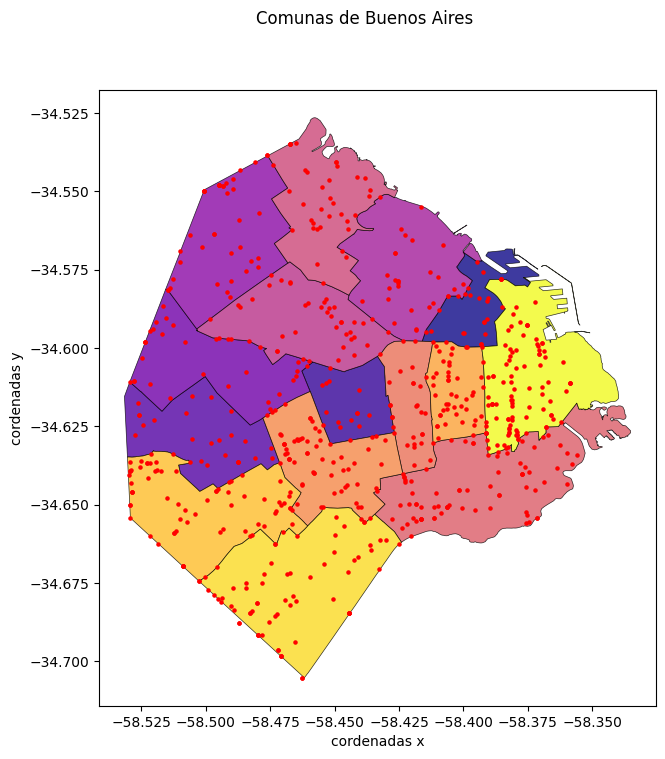

In [18]:
# Crea una nueva figura y un conjunto de subtramas
fig, ax = plt.subplots(figsize=(10,8))

# Dibuja el mapa espacial en las subtramas creadas anteriormente
mapa_espacial.plot(ax=ax, facecolor='Grey', edgecolor='k',alpha=0.8,linewidth=0.5,cmap="plasma")

# Dibuja la ubicación geográfica en las mismas subtramas
ubicacion_geografica.plot(ax=ax, color='red', markersize=5)

# Establece el título de la figura
fig.suptitle('Comunas de Buenos Aires', fontsize=12)

# Establece las etiquetas de los ejes x e y
ax.set_xlabel('cordenadas x', fontsize=10)
ax.set_ylabel('cordenadas y', fontsize='medium')


**Al observar la distribución de los puntos, se puedes identificar áreas con alta concentración de accidentes. Estas áreas podrían ser de particular interés para las autoridades de seguridad vial para implementar medidas preventivas y mejorar la seguridad.**

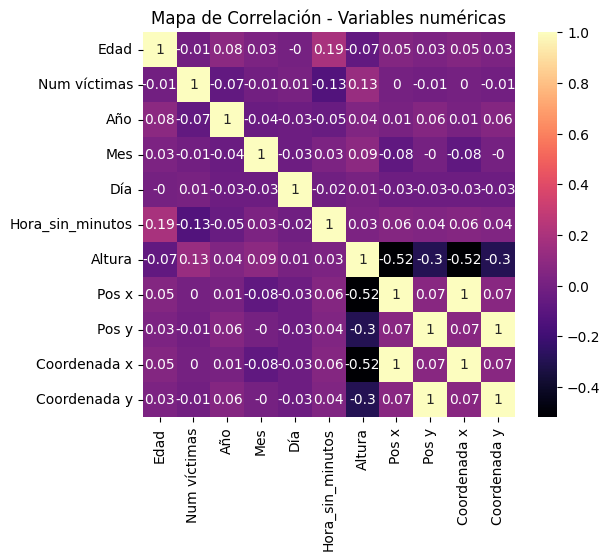

In [19]:
# Selecciona solo las columnas numéricas del DataFrame
mapa_calor = dataset.select_dtypes(include=['number']) 

# Calcula la correlación entre las columnas numéricas
correlaciones = mapa_calor.corr().round(2)

# Crea una nueva figura
plt.figure(figsize=(6,5))

# Dibuja un mapa de calor de las correlaciones
sns.heatmap(correlaciones, cmap="magma", annot=True)

# Establece el título del gráfico
plt.title('Mapa de Correlación - Variables numéricas')

# Muestra el gráfico
plt.show()


1. **Las variable “Hora” y “Num. victimas”** 
 - tienen una correlación positiva, esto podría indicar que a ciertas horas del día ocurren más accidentes.

2. **Las variables “Edad” y “Num. victimas”**
 - tienen una correlación positiva, esto podría indicar que los accidentes ocurren con mayor frecuencia entre ciertos grupos de edad. Esto podría ser útil para identificar a los grupos de edad que están en mayor riesgo y desarrollar estrategias de prevención dirigidas a esos grupos.

3. **las variables “Coordenada x” y “Coordenada y”**
 - tienen una correlación positiva, esto podría indicar que hay ciertas áreas geográficas donde ocurren más accidentes.

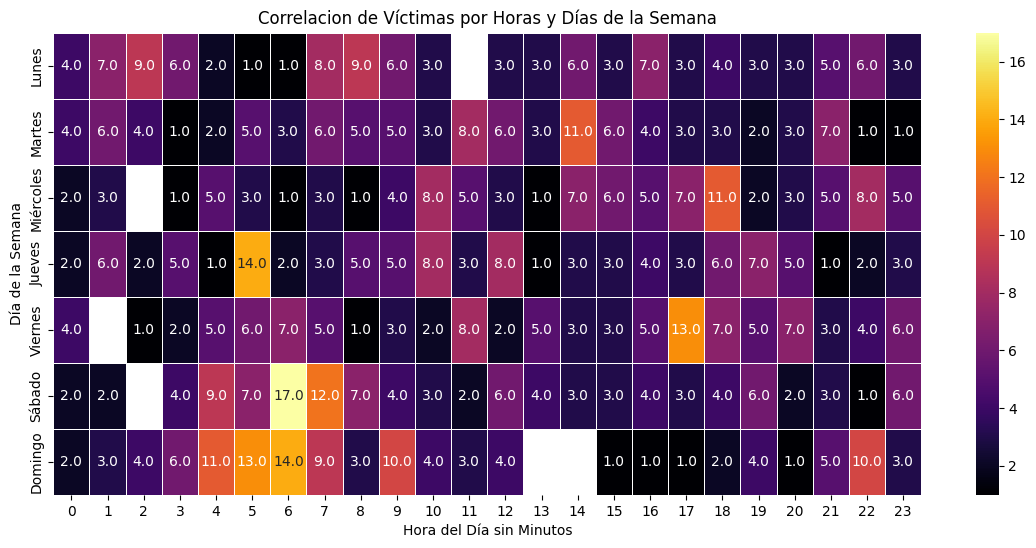

In [20]:

# Agrupa los datos por 'Dias de la semana' y 'Hora_sin_minutos', y calcula la suma de 'Num víctimas'
data = dataset.groupby(['Dias de la semana', "Hora_sin_minutos"])['Num víctimas'].sum().reset_index()

# Convierte la columna 'Hora_sin_minutos' a un tipo de dato entero
data["Hora_sin_minutos"] = data["Hora_sin_minutos"].astype("Int64")

# Define el orden de los días de la semana
dias_ordenados = ["Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado", "Domingo"]

# Crea una nueva columna que representa el orden de los días de la semana
data['Dias_ordenados'] = data['Dias de la semana'].apply(lambda x: dias_ordenados.index(x))

# Ordena los datos por el orden de los días de la semana
data = data.sort_values(by='Dias_ordenados')

# Crea una tabla pivot para visualizar el número de víctimas por hora y día de la semana
pivot_data = data.pivot_table(index='Dias de la semana', columns='Hora_sin_minutos', values='Num víctimas', aggfunc='sum')

# Reordena la tabla pivot según el orden de los días de la semana
pivot_data = pivot_data.reindex(dias_ordenados)

# Crea un mapa de calor para visualizar las correlaciones
plt.figure(figsize=(14, 6))
sns.heatmap(pivot_data, cmap='inferno', annot=True, fmt='.1f', linewidths=0.5)

# Configura las etiquetas y el título del gráfico
plt.xlabel('Hora del Día sin Minutos')
plt.ylabel('Día de la Semana')
plt.title('Correlacion de Víctimas por Horas y Días de la Semana')

# Muestra el gráfico
plt.show()



**Mapa de calor que muestra la correlación entre el número de víctimas de accidentes, las horas del día y los días de la semana.**

1. **Días de la semana:**
 - Parece que los viernes y sábados tienen una mayor cantidad de víctimas de accidentes, especialmente durante las horas de la tarde y la noche. Esto podría indicar que hay más accidentes    durante el fin de semana, posiblemente debido a un mayor volumen de tráfico o a comportamientos de conducción más peligrosos durante estos días.

2. **Hora del día:**
 - Las horas de la tarde y la noche (entre las 18 y las 21) parecen tener una mayor cantidad de víctimas de accidentes. Esto podría indicar que hay más accidentes durante estas horas, posiblemente debido a factores como la fatiga del conductor, la disminución de la visibilidad o el aumento del tráfico.

3.**Número de víctimas:**
 - Los colores más oscuros en el gráfico representan un mayor número de víctimas. Esto sugiere que ciertas combinaciones de días de la semana y horas del día tienen un mayor número de víctimas de accidentes.

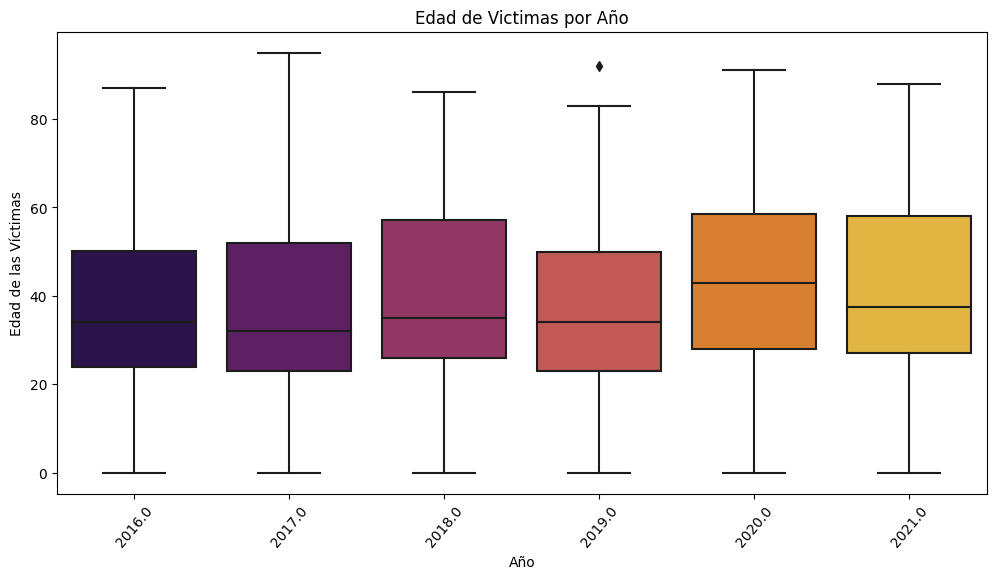

In [106]:
# Agrupa los datos por 'Edad' y 'Año', y calcula la suma de 'Num víctimas'
data = dataset.groupby(['Edad', "Año"])['Num víctimas'].sum().reset_index()

# Crea una nueva figura
plt.figure(figsize=(12, 6))

# Dibuja un gráfico de caja para cada año, mostrando la distribución de las edades de las víctimas
sns.boxplot(x='Año', y='Edad', data=dataset, palette='inferno')

# Configura el título y las etiquetas de los ejes del gráfico
plt.title('Edad de Victimas por Año') ; plt.xlabel('Año') ; plt.ylabel('Edad de las Víctimas')

# Rota las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=50)

# Muestra el gráfico
plt.show()



**El gráfico de caja muestra las conclusiones siguientes:**

**Tendencia general:**
 - Parece que la mediana de la edad de las víctimas está aumentando con el tiempo. Esto podría indicar que las víctimas de accidentes tienden a ser de mayor edad en años más recientes en comparación con los años anteriores.

**Variabilidad:**
 - Las cajas representan el rango intercuartil (IQR), que es el rango donde cae la mitad central de los datos. Si las cajas son grandes, indica que hay una gran variabilidad en las edades de las víctimas para ese año. Si son pequeñas, indica que las edades de las víctimas están más concentradas.

**Outliers:**
 - Los puntos fuera de las cajas se consideran outliers o valores atípicos. Por ejemplo, hay un outlier en el año 2021. Esto podría indicar que hubo una víctima de edad significativamente diferente en comparación con las demás víctimas de ese año.

***En el año 2021 la caja es la más grande de todas, lo que indica la mayor variabilidad en las edades de las víctimas. También hay un valor atípico notable en este año. La mediana es la más alta de todas, lo que indica que la edad media de las víctimas fue la más alta en 2021.***

***La variabilidad en las edades de las víctimas podría deberse a una serie de factores. Por ejemplo, podría ser que en 2021 hubo un aumento en los accidentes que involucraron a personas de una amplia gama de edades. El valor atípico podría indicar que hubo una víctima de edad significativamente diferente en comparación con las demás víctimas de ese año.***

***El aumento en la mediana de la edad de las víctimas podría indicar un cambio en las tendencias de los accidentes en 2021. Por ejemplo, podría ser que los accidentes estuvieran afectando más a las personas mayores en comparación con los años anteriores. Esto podría deberse a cambios en los patrones de tráfico, a cambios en las conductas de conducción o a otros factores.***

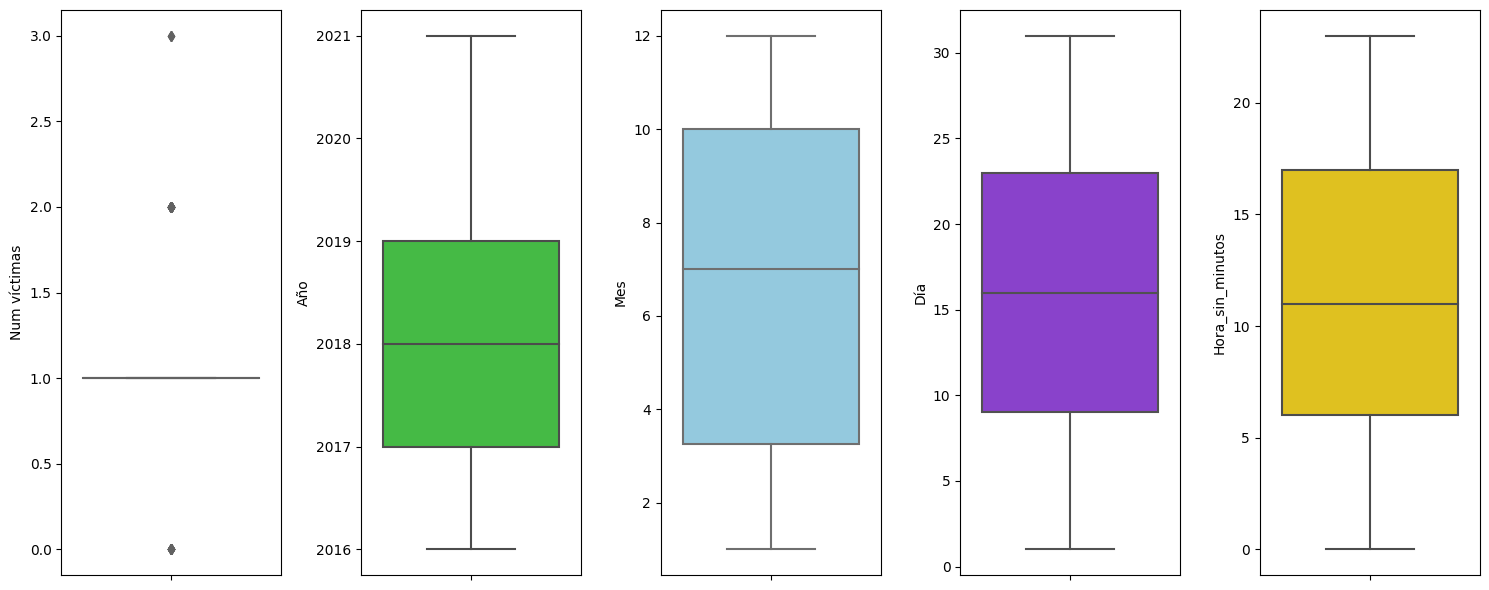

In [135]:
# Crea una nueva figura con un tamaño específico
plt.figure(figsize=(15, 6))

# Crea un gráfico de caja para 'Num víctimas'
plt.subplot(1, 5, 1) 
sns.boxplot(data=dataset, y='Num víctimas', color="#FF6347")  

# Crea un gráfico de caja para 'Año'
plt.subplot(1, 5, 2) 
sns.boxplot(data=dataset, y='Año', color="#32CD32")  

# Crea un gráfico de caja para 'Mes'
plt.subplot(1, 5, 3) 
sns.boxplot(data=dataset, y='Mes', color="#87CEEB")  

# Crea un gráfico de caja para 'Día'
plt.subplot(1, 5, 4) 
sns.boxplot(data=dataset, y='Día', color="#8A2BE2")  

# Crea un gráfico de caja para 'Hora_sin_minutos'
plt.subplot(1, 5, 5) 
sns.boxplot(data=dataset, y='Hora_sin_minutos', color="#FFD700")  

# Ajusta el diseño para asegurar que los subgráficos no se superpongan
plt.tight_layout()

# Muestra el gráfico
plt.show()



**Año:**
 - La caja para “Año” parece ser la más grande, lo que indica una gran variabilidad en el número de víctimas de accidentes de un año a otro. Esto podría deberse a una serie de factores, como cambios en las condiciones de tráfico, implementación de medidas de seguridad vial, entre otros.

**Mes:**
 - La caja para “Mes” es más pequeña que la de “Año”, lo que indica una menor variabilidad en el número de víctimas de accidentes de un mes a otro. Esto podría sugerir que el número de accidentes es relativamente constante a lo largo del año.

**Día:**
 - La caja para “Día” es la más pequeña, lo que indica la menor variabilidad en el número de víctimas de accidentes de un día a otro. Esto podría sugerir que el número de accidentes es relativamente constante a lo largo del mes.

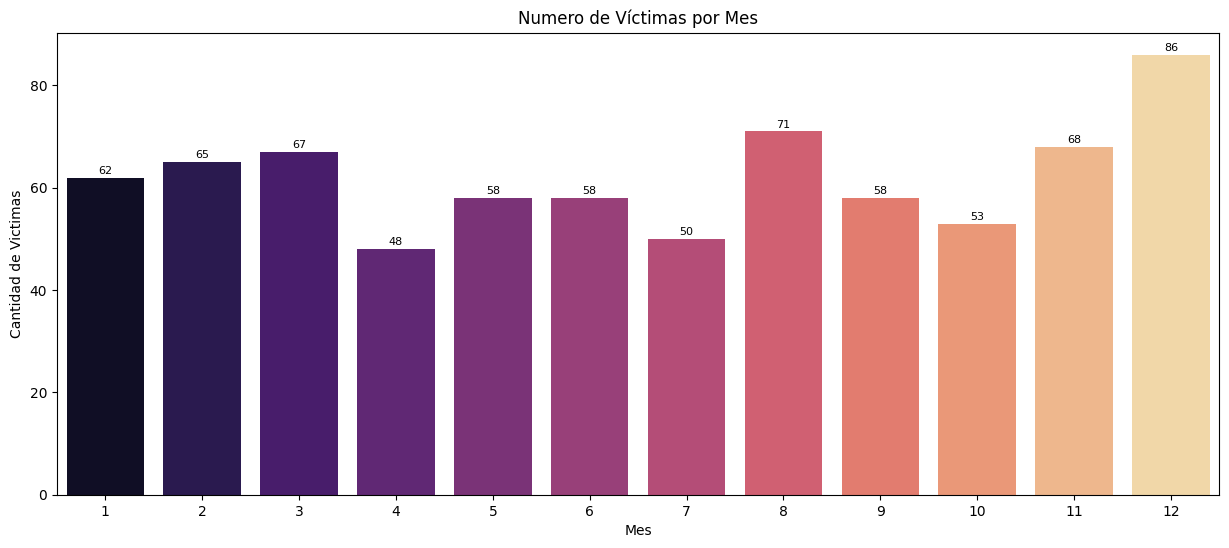

In [136]:
# Agrupa los datos por 'Mes' y calcula la suma de 'Num víctimas'
data = dataset.groupby(['Mes'])['Num víctimas'].sum().reset_index()

# Convierte la columna 'Mes' a un tipo de dato entero
data["Mes"]=data["Mes"].astype("Int64")

# Crea una nueva figura
plt.figure(figsize=(15,6))

# Dibuja un gráfico de barras para cada mes, mostrando el número de víctimas
ax = sns.barplot(x='Mes', y='Num víctimas', data=data, palette="magma")

# Configura el título y las etiquetas de los ejes del gráfico
ax.set_title('Numero de Víctimas por Mes')
ax.set_xlabel('Mes') ; ax.set_ylabel('Cantidad de Victimas')

# Añade anotaciones a cada barra en el gráfico de barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

# Muestra el gráfico
plt.show()


**Mes:**
 - El número de víctimas varia dependiendo del mes. Diciembre tiene el mayor número de víctimas, con 86, mientras que junio tiene el menor número, con 53. Esto suguiere que hay más accidentes en diciembre en comparación con junio.

**Posibles causas:**
 - Hay muchas posibles causas para estas variaciones. Por ejemplo, podría ser que haya más tráfico en diciembre debido a las vacaciones, lo que aumenta la probabilidad de accidentes. Otra posible causa podría ser que los conductores estén más cansados o distraídos en diciembre, lo que también podría aumentar el riesgo de accidentes.

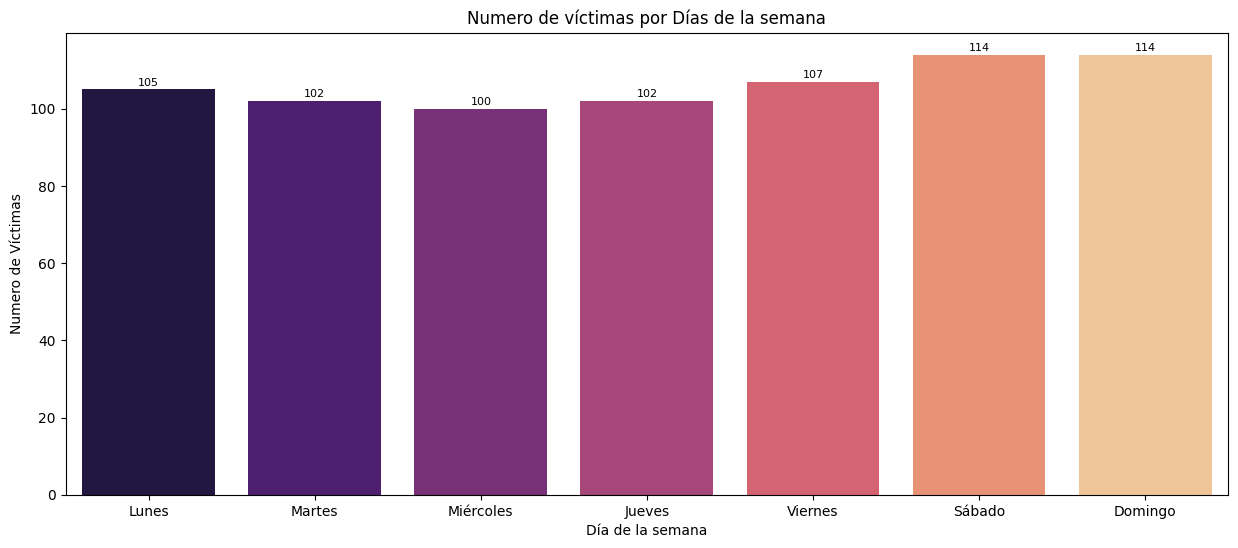

In [138]:
# Agrupa los datos por 'Dias de la semana' y calcula la suma de 'Num víctimas'
data = dataset.groupby(['Dias de la semana'])['Num víctimas'].sum().reset_index()

# Define el orden de los días de la semana
dias_ordenados = ["Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado", "Domingo"]

# Crea una nueva columna que representa el orden de los días de la semana
data['Dias_ordenados'] = data['Dias de la semana'].apply(lambda x: dias_ordenados.index(x))

# Ordena los datos por el orden de los días de la semana
data = data.sort_values(by='Dias_ordenados')

# Crea una nueva figura
plt.figure(figsize=(15, 6))

# Dibuja un gráfico de barras para cada día de la semana, mostrando el número de víctimas
ax = sns.barplot(x='Dias de la semana', y='Num víctimas', data=data, palette="magma")

# Configura el título y las etiquetas de los ejes del gráfico
ax.set_title('Numero de víctimas por Días de la semana')
ax.set_xlabel('Día de la semana')
ax.set_ylabel('Numero de Víctimas')

# Añade anotaciones a cada barra en el gráfico de barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

# Muestra el gráfico
plt.show()

**Día de la semana:**
 - El número de víctimas parece variar dependiendo del día de la semana. El domingo tiene el mayor número de víctimas, con 114, mientras que el lunes tiene el menor número, con 96. 
 - Posibles cauasas conductores cansados, aumento del trafico en determinados horarios nocturnos, regreso a casa despues del fin de semana, aumento de conductores bajo efectos de sustancias.

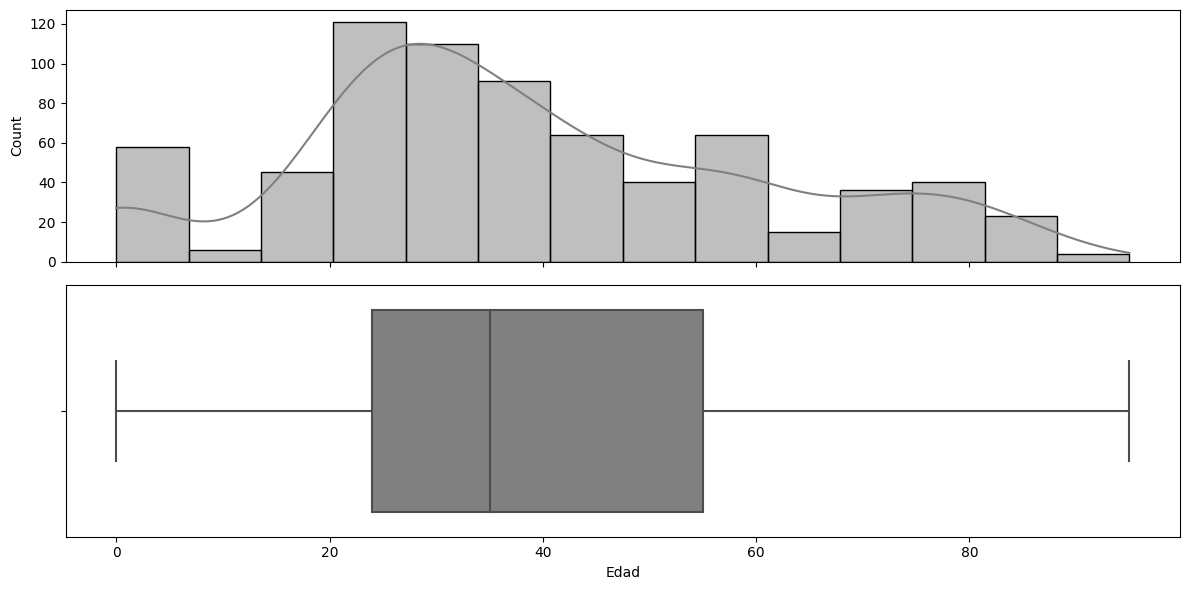

In [145]:
# Crea una nueva figura con dos subtramas
fig, ax = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

# Dibuja un histograma de la columna 'Edad' en la primera subtrama con color verde
sns.histplot(dataset['Edad'], kde=True, ax=ax[0], color='grey')

# Dibuja un gráfico de caja de la columna 'Edad' en la segunda subtrama con color rojo
sns.boxplot(x=dataset['Edad'], ax=ax[1], color='grey')

# Ajusta el diseño para asegurar que las subtramas no se superpongan
plt.tight_layout()

# Muestra el gráfico
plt.show()


**Histograma:**
 - Este gráfico muestra la distribución de frecuencias de la variable ‘Edad’. Cada barra representa un rango de edades, y la altura de la barra indica el número de observaciones que caen dentro de ese rango. La mayor cantidad de datos se agrupa alrededor de los 40 años.

 - Está está sesgado a la izquierda lo que indica que que las victimas la gran mayoria son mayores de 20 años.

**Gráfico de caja:**
 - Este gráfico proporciona un resumen visual de la variable ‘Edad’. La caja representa el rango intercuartil (IQR), que contiene el 50% central de los datos. La línea dentro de la caja es la mediana. Los ‘bigotes’ se extienden desde la caja hasta los valores mínimos y máximos dentro de 1.5 veces el IQR. Los puntos fuera de los bigotes se consideran como valores atípicos.

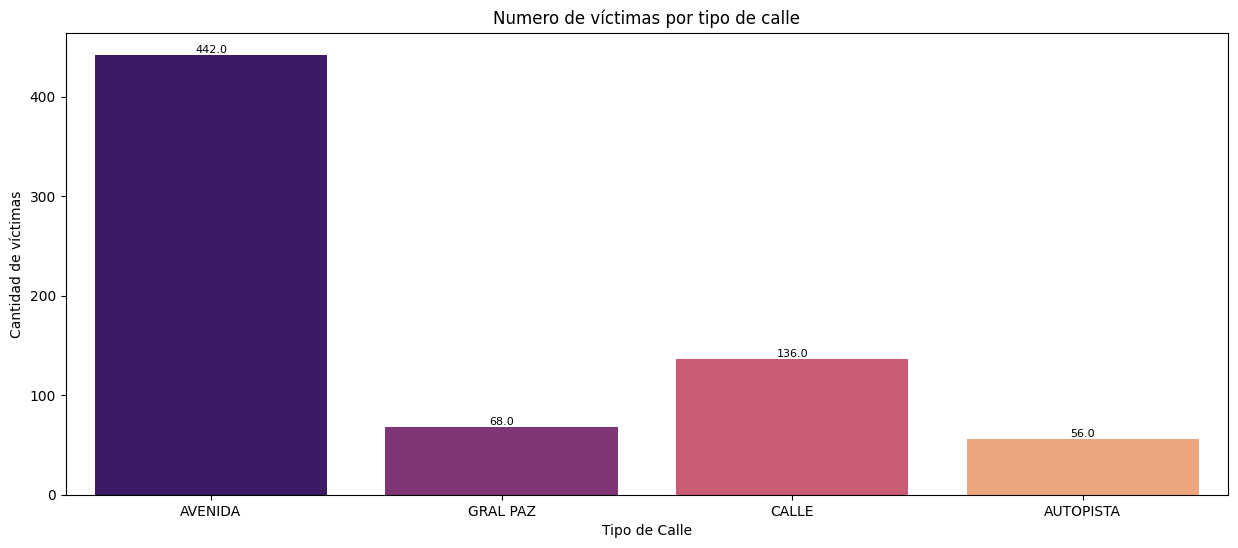

In [149]:
plt.figure(figsize=(15, 6))  # Establece el tamaño de la figura

ax=sns.countplot(dataset, x='Tipo de calle', palette="magma")  # Crea un gráfico de barras que cuenta la cantidad de cada 'Tipo de calle'

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=8)  # Anota la altura de cada barra en el gráfico

plt.xlabel('Tipo de Calle')  # Establece la etiqueta del eje x
plt.ylabel('Cantidad de víctimas')  # Establece la etiqueta del eje y
plt.title('Numero de víctimas por tipo de calle')  # Establece el título del gráfico

plt.show()  # Muestra el gráfico


**Avenidas:**
 - Las avenidas parecen ser el tipo de calle con el mayor número de víctimas, con un total de 442. Esto podría indicar que las avenidas son potencialmente más peligrosas en términos de accidentes o incidentes.

**General Paz y Calles:**
 - General Paz y las calles tienen un número significativamente menor de víctimas en comparación con las avenidas, con 68 y 136 víctimas respectivamente. Esto podría sugerir que estos tipos de calles son relativamente más seguros.
 
**Autopistas:**
 - Las autopistas tienen el menor número de víctimas, con un total de 56. Esto podría indicar que las autopistas son el tipo de calle más seguro entre las categorías presentadas. 

In [4]:
periodo_tiempo = dataset.groupby(['Año', 'Mes'])['Num víctimas'].sum().reset_index()

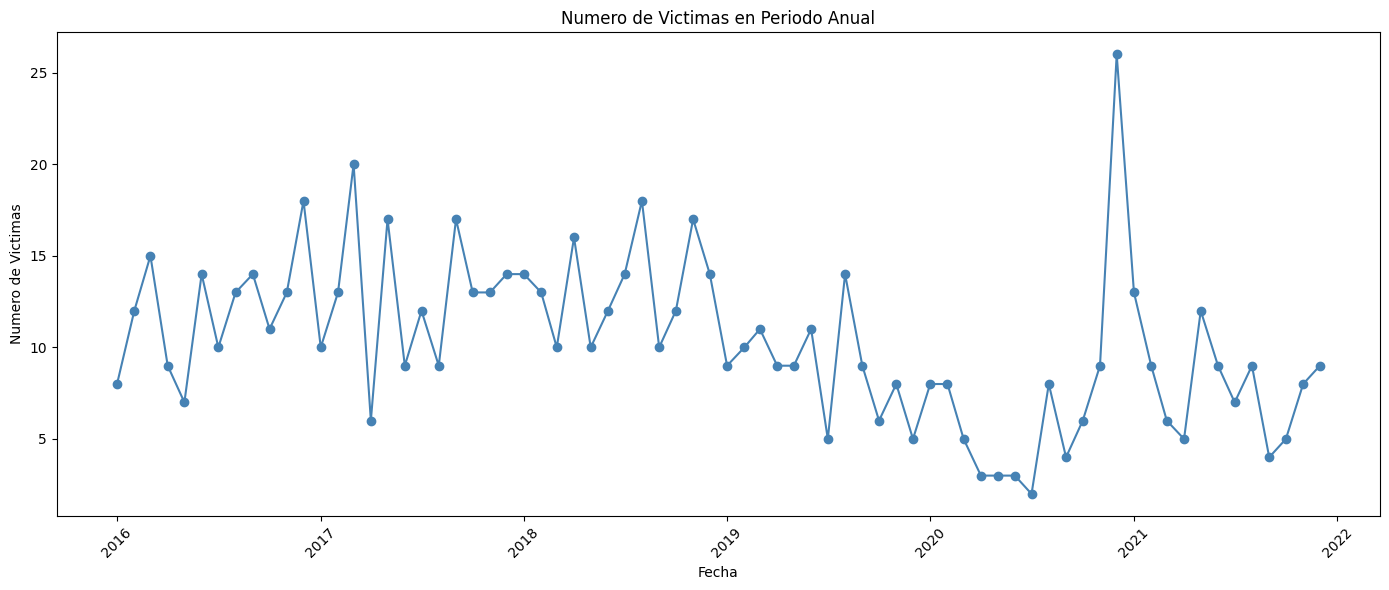

In [8]:
periodo_tiempo["Año"]= periodo_tiempo["Año"].astype("Int64")  # Convierte la columna 'Año' a tipo de dato entero

periodo_tiempo["Mes"]= periodo_tiempo["Mes"].astype("Int64")  # Convierte la columna 'Mes' a tipo de dato entero

periodo_tiempo["Fecha"] = periodo_tiempo["Año"].astype(str) + '-' + periodo_tiempo["Mes"].astype(str)  # Combina las columnas 'Año' y 'Mes' en una nueva columna 'Fecha'

periodo_tiempo["Fecha"] = pd.to_datetime(periodo_tiempo["Fecha"])  # Convierte la columna 'Fecha' a tipo de dato fecha

periodo_tiempo = periodo_tiempo.sort_values("Fecha")  # Ordena el DataFrame por la columna 'Fecha'

plt.figure(figsize=(14, 6))  # Establece el tamaño de la figura
plt.plot(periodo_tiempo["Fecha"], periodo_tiempo["Num víctimas"], marker='o', color='steelblue')  # Crea un gráfico de líneas de 'Num víctimas' en función de 'Fecha'

plt.title('Numero de Victimas en Periodo Anual')  # Establece el título del gráfico
plt.xlabel('Fecha')  # Establece la etiqueta del eje x
plt.ylabel('Numero de Victimas')  # Establece la etiqueta del eje y

plt.xticks(rotation=45)  # Rota las etiquetas del eje x 45 grados

plt.tight_layout()  # Ajusta el diseño para asegurar que las subtramas no se superpongan
plt.show()  # Muestra el gráfico


**Tendencia general:**
 - Parece que el número de víctimas ha aumentado con el tiempo, desde 2016 hasta 2021.

**Pico en 2021:**
 - Hay un pico pronunciado en el número de víctimas alrededor de mediados de 2021. Esto podría indicar un evento o cambio significativo en ese momento que resultó en un aumento de las víctimas.
 
**Bajo número de víctimas en 2019:**
 - El número de víctimas parece ser más bajo en 2019 en comparación con otros años.

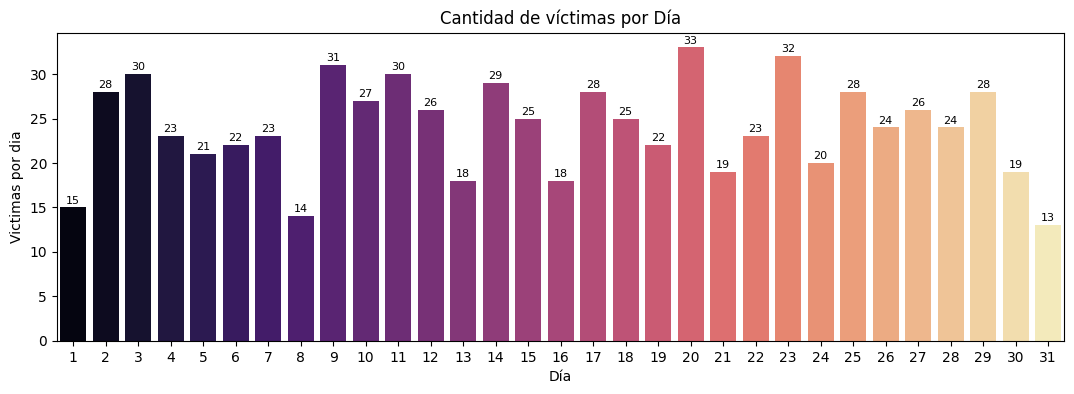

In [5]:

data = dataset.groupby(['Día'])['Num víctimas'].sum().reset_index()  # Agrupa el conjunto de datos por 'Día' y calcula la suma de 'Num víctimas' para cada día

data["Día"]=data["Día"].astype("Int64")  # Convierte la columna 'Día' a tipo de dato entero

plt.figure(figsize=(13,4))  # Establece el tamaño de la figura

ax = sns.barplot(x='Día', y='Num víctimas', data=data, palette="magma")  # Crea un gráfico de barras que muestra el número de víctimas para cada día

ax.set_title('Cantidad de víctimas por Día')  # Establece el título del gráfico
ax.set_xlabel('Día') ; ax.set_ylabel('Victimas por dia')  # Establece las etiquetas de los ejes x e y

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')  # Anota la altura de cada barra en el gráfico

plt.show()  # Muestra el gráfico


**Día con más víctimas:**
 - El día 25 parece tener el mayor número de víctimas, con un total de 33. Se debe analizar las posibles causas.

**Día con menos víctimas:**
 - El día 31 parece tener el menor número de víctimas, con un total de 13. 

**Tendencias generales:**
 - Buscar tendencias generales en los datos, como si hay más víctimas en ciertos días del mes en comparación con otros.

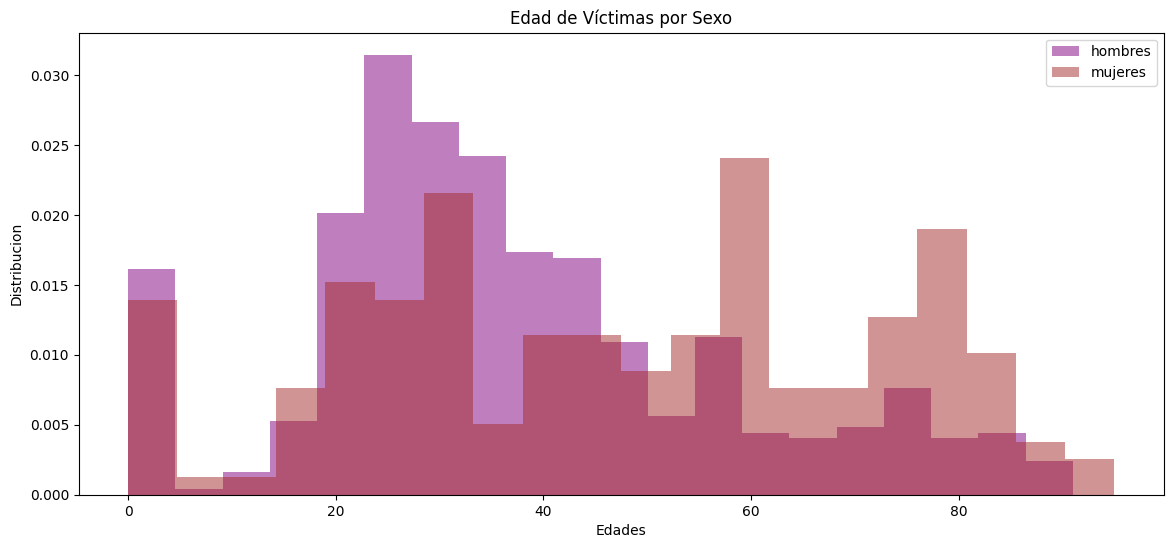

In [12]:
hombres = dataset[dataset['Sexo'] == 'MASCULINO']['Edad'].dropna()  # Filtra el conjunto de datos para obtener solo las edades de los hombres

mujeres = dataset[dataset['Sexo'] == 'FEMENINO']['Edad'].dropna()  # Filtra el conjunto de datos para obtener solo las edades de las mujeres

plt.figure(figsize=(14, 6))  # Establece el tamaño de la figura

plt.hist(hombres, bins=20, alpha=0.5, color='purple', label='hombres', density=True)  # Crea un histograma de las edades de los hombres
plt.hist(mujeres, bins=20, alpha=0.5, color='brown', label='mujeres', density=True)  # Crea un histograma de las edades de las mujeres

plt.title('Edad de Víctimas por Sexo')  # Establece el título del gráfico
plt.xlabel('Edades')  # Establece la etiqueta del eje x
plt.ylabel('Distribucion')  # Establece la etiqueta del eje y

plt.legend()  # Muestra la leyenda del gráfico

plt.show()  # Muestra el gráfico


**Hombres:**
 - La distribución de las edades de las víctimas masculinas tiene un pico alrededor de los 20-30 años. Esto podría indicar que los hombres en este rango de edad son más propensos a ser víctimas.

**Mujeres:**
 - La distribución de las edades de las víctimas femeninas tiene un pico alrededor de los 40-50 años. Esto podría sugerir que las mujeres en este rango de edad son más propensas a ser víctimas.

**Comparación entre hombres y mujeres:**
 - Para las edades de 20 a 60 años, parece haber más víctimas masculinas que femeninas. Sin embargo, para las edades de 60 a 80 años, parece haber más víctimas femeninas que masculinas.

In [12]:
dataset= pd.read_csv('HOMICIDIOS_LIMPIO.csv')
dataset.head(2)

,Id,Rol,Sexo,Edad,Fecha fallecimiento,Rango etario,Num víctimas,Fecha,Año,Mes,...,Pos y,Participantes,Victima,Acusado,Coordenada x,Coordenada y,Dias de la semana,Cruces de calles,Semestre,geometry
0,2016-0001,CONDUCTOR,MASCULINO,19,2016-01-01,Menos de 20,1,2016-01-01,2016.0,1.0,...,-34.687570,MOTO-AUTO,MOTO,AUTO,98896.782384,93532.434378,Viernes,True,1,POINT (98896.78238426 93532.43437792)
1,2016-0002,CONDUCTOR,MASCULINO,70,2016-01-02,Entre 61-80,1,2016-01-02,2016.0,1.0,...,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS,95832.055711,95505.416420,Sábado,True,1,POINT (95832.05571093 95505.41641999)


In [13]:
dataset.columns

Index(['Id', 'Rol', 'Sexo', 'Edad', 'Fecha fallecimiento', 'Rango etario',
       'Num víctimas', 'Fecha', 'Año', 'Mes', 'Día', 'Hora',
       'Hora_sin_minutos', 'Lugar del hecho', 'Tipo de calle', 'Calle',
       'Altura', 'Cruce', 'Dirección normalizada', 'Comuna', 'Xy (caba)',
       'Pos x', 'Pos y', 'Participantes', 'Victima', 'Acusado', 'Coordenada x',
       'Coordenada y', 'Dias de la semana', 'Cruces de calles', 'Semestre',
       'geometry'],
      dtype='object')

In [28]:
Kpi1 = dataset.groupby(["Año", "Semestre"])["Num víctimas"].sum().reset_index()
Kpi1["Homisidios_Siniestros_Viales"] = Kpi1["Num víctimas"]/3120612*100000
Kpi1

,Año,Semestre,Num víctimas,Homisidios_Siniestros_Viales
0,2016.0,1,65,2.082925
1,2016.0,2,79,2.531555
2,2017.0,1,75,2.403375
3,2017.0,2,78,2.499510
4,2018.0,1,75,2.403375
5,2018.0,2,85,2.723825
6,2019.0,1,57,1.826565
7,2019.0,2,45,1.442025
8,2020.0,1,30,0.961350
9,2020.0,2,55,1.762475


In [29]:
Kpi1["Porcentaje de Cambio"] = Kpi1["Homisidios_Siniestros_Viales"].pct_change() * 100
Kpi1

,Año,Semestre,Num víctimas,Homisidios_Siniestros_Viales,Porcentaje de Cambio
0,2016.0,1,65,2.082925,NaN
1,2016.0,2,79,2.531555,21.538462
2,2017.0,1,75,2.403375,-5.063291
3,2017.0,2,78,2.499510,4.000000
4,2018.0,1,75,2.403375,-3.846154
5,2018.0,2,85,2.723825,13.333333
6,2019.0,1,57,1.826565,-32.941176
7,2019.0,2,45,1.442025,-21.052632
8,2020.0,1,30,0.961350,-33.333333
9,2020.0,2,55,1.762475,83.333333


In [30]:
Kpi1.dtypes

Año                             float64
Semestre                          int64
Num víctimas                      int64
Homisidios_Siniestros_Viales    float64
Porcentaje de Cambio            float64
dtype: object

In [31]:
# Convertir la columna "Año" a cadena y eliminar el ".0" a la izquierda
Kpi1["Año"] = Kpi1["Año"].astype(int).astype(str)

In [32]:
# Se combinan las columnas Año y Semestre en una sola columna Año_Semestre para facilitar los cálculos
Kpi1["semestre_año"] = Kpi1["Año"].astype(str) + "." + Kpi1["Semestre"].astype(str)
Kpi1["semestre_año"] = Kpi1["semestre_año"].astype(float)

In [33]:
Kpi1

,Año,Semestre,Num víctimas,Homisidios_Siniestros_Viales,Porcentaje de Cambio,semestre_año
0,2016,1,65,2.082925,NaN,2016.1
1,2016,2,79,2.531555,21.538462,2016.2
2,2017,1,75,2.403375,-5.063291,2017.1
3,2017,2,78,2.499510,4.000000,2017.2
4,2018,1,75,2.403375,-3.846154,2018.1
5,2018,2,85,2.723825,13.333333,2018.2
6,2019,1,57,1.826565,-32.941176,2019.1
7,2019,2,45,1.442025,-21.052632,2019.2
8,2020,1,30,0.961350,-33.333333,2020.1
9,2020,2,55,1.762475,83.333333,2020.2


In [34]:

Kpi1[Kpi1["Porcentaje de Cambio"]<-10].reset_index()

,index,Año,Semestre,Num víctimas,Homisidios_Siniestros_Viales,Porcentaje de Cambio,semestre_año
0,6,2019,1,57,1.826565,-32.941176,2019.1
1,7,2019,2,45,1.442025,-21.052632,2019.2
2,8,2020,1,30,0.961350,-33.333333,2020.1
3,11,2021,2,42,1.345890,-22.222222,2021.2


##### El mayor cambio porcentual negativo en el número de víctimas de siniestros viales ocurrió en el semestre 1 del año 2020, con una disminución del 33.33% en comparación con el semestre anterior.
##### Esta disminución del 33.33% supera el objetivo establecido de reducir en un 10% la tasa de homicidios en siniestros viales. Por lo tanto, ese periodo específico podría considerarse como un ejemplo exitoso de implementación de medidas efectivas para alcanzar el objetivo de seguridad vial en CABA.

In [35]:
condicion = (dataset["Rol"] == "CONDUCTOR") & (df["Victima"] == "MOTO")
filtro = dataset[condicion]
resumen_anual = filtro.groupby("Año")["Num víctimas"].sum().reset_index()

In [36]:
resumen_anual

,Año,Num víctimas
0,2016.0,54
1,2017.0,44
2,2018.0,53
3,2019.0,43
4,2020.0,26
5,2021.0,38


In [37]:
# Se agrupa por año y se suma el número de víctimas
Kpi2 = filtro.groupby("Año")["Num víctimas"].sum().reset_index()

# Se calcula la columna de accidentes mortales de moto
Kpi2["Accidentes Mortales de Motos"] = ((Kpi2["Num víctimas"].shift(1) - Kpi2["Num víctimas"]) / Kpi2["Num víctimas"].shift(1) * 100).fillna(0)

# Muestra el DataFrame resultante
Kpi2


,Año,Num víctimas,Accidentes Mortales de Motos
0,2016.0,54,0.000000
1,2017.0,44,18.518519
2,2018.0,53,-20.454545
3,2019.0,43,18.867925
4,2020.0,26,39.534884
5,2021.0,38,-46.153846


En comparación con el año anterior, se observa una variabilidad en la cantidad de accidentes mortales de motociclistas en los últimos años en CABA.

- El año 2017 muestra un aumento del 18.52% en comparación con el año 2016, mientras que el año 2018 experimenta una disminución del 20.45%.

- En el año 2019, hay un aumento del 18.87% en comparación con el año 2018, pero en el año 2020 se produce una disminución significativa del 39.53%.

- Sin embargo, en el año 2021, se observa una disminución del 46.15% en comparación con el año anterior, lo que supera la meta establecida de reducir en un 7% la cantidad de accidentes mortales de motociclistas.

En general, a pesar de las fluctuaciones anuales, se logra alcanzar la meta del 7% de reducción en el último año en CABA, principalmente debido a la disminución sustancial en el año 2020 y la continuación de la tendencia descendente en el año 2021.


In [38]:
Kpi3 = dataset[dataset["Comuna"]=='Comuna N°1']
victimas_anuales = Kpi3.groupby(["Año"])["Num víctimas"].sum().reset_index()
victimas_anuales["Homisidios_Siniestros_Viales"] = victimas_anuales["Num víctimas"]/205886*1000000
victimas_anuales

,Año,Num víctimas,Homisidios_Siniestros_Viales
0,2016.0,22,106.855250
1,2017.0,26,126.283477
2,2018.0,22,106.855250
3,2019.0,10,48.570568
4,2020.0,10,48.570568
5,2021.0,9,43.713511


In [39]:
victimas_anuales["Porcentaje de cambio"] = victimas_anuales["Homisidios_Siniestros_Viales"].pct_change() * 100
victimas_anuales

,Año,Num víctimas,Homisidios_Siniestros_Viales,Porcentaje de cambio
0,2016.0,22,106.855250,NaN
1,2017.0,26,126.283477,18.181818
2,2018.0,22,106.855250,-15.384615
3,2019.0,10,48.570568,-54.545455
4,2020.0,10,48.570568,0.000000
5,2021.0,9,43.713511,-10.000000


**En el análisis del KPI3 de Homisidios en Siniestros Viales en CABA, se observa una tendencia variable a lo largo de los años.**

 - 2016: Se registraron 22 víctimas de homicidios en siniestros viales, con una tasa de 106.86 por cada millón de habitantes.

 - 2017: Hubo un aumento significativo del 18.18% en comparación con el año anterior, alcanzando 26 víctimas y una tasa de 126.28.

 - 2018: Se observa una disminución en la cantidad de víctimas, con una reducción del 15.38% respecto al año anterior.

 - 2019 y 2020: Se mantuvo la misma cantidad de víctimas (10) y la tasa se mantuvo en 48.57. Destaca que no hubo variación porcentual en 2020, indicando estabilidad en comparación con el año anterior.

 - 2021: Se registró una disminución del 10% en comparación con 2020, con 9 víctimas y una tasa de 43.71.

**En conclusión, aunque se observa cierta variabilidad en los últimos años, se destaca una disminución en el número de víctimas y en la tasa de homicidios en siniestros viales, sugiriendo una tendencia positiva en la seguridad vial en este aspecto. Es importante continuar monitoreando y mejorando las medidas de seguridad para garantizar una reducción sostenida en este indicador.**





